In [3]:
!pip install pyarrow

     |████████████████████████████████| 42.3 MB 9.1 kB/s eta 0:00:01


In [1]:
import pandas as pd
import sklearn

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn.metrics import mean_squared_error

In [8]:
#Question-1 : Downloading the Dataset
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')


total_records = df.shape[0]

In [9]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

#Finding the difference between dropoff and pickup
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

#Finding the duration in minutes
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)


In [10]:
#Question-2: Computing the Standard deviation for the duration


df.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [11]:
#Question-3: Finding the rides with duration between 1 and 60 minutes 
filtered_df = df[(df.duration >= 1) & (df.duration <= 60)]

filtered_records = filtered_df.shape[0]

fraction_left = (filtered_records/total_records)*100

print(fraction_left)

In [14]:
#Question-4: One-hot coding choosing the categorical values

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']


df[categorical] = df[categorical].astype(str)

#Turning the dataframe into list of dictnoraies
train_dicts = df[categorical + numerical].to_dict(orient='records')

#Fit a dictionary vectorizer
dv = DictVectorizer()

#Feature Matrix
X_train = dv.fit_transform(train_dicts)

In [18]:
X_train.shape

(3066766, 519)

In [30]:
target = 'duration'
y_train = df[target].values

In [31]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_train)

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.legend(*args, **kwargs)>

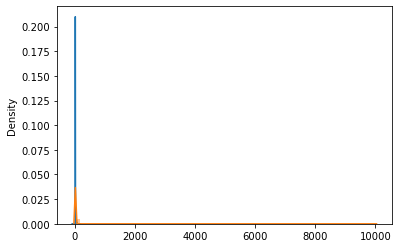

In [37]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend

In [38]:
mean_squared_error(y_train, y_pred, squared=False)

41.99654983487184